In [8]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import mplcatppuccin
import matplotlib as mpl
import numpy as np

import time

mpl.style.use('latte')

df = pd.read_csv('../data/uncleaned_csv/train_img_unclean.csv')
df.nunique()

IDX       465
Name      445
Origin     12
Type        1
Width       1
Height      1
Path      465
dtype: int64

In [9]:
def plt_img(start_idx):
    fig, ax = plt.subplots(8,8)
    fig.set_size_inches(30,30)
    c = 0
    for i in range(0,8):
        for j in range(0,8):
            img = cv2.cvtColor(cv2.imread(df['Path'].iloc[start_idx + c]), cv2.COLOR_BGR2GRAY)
            ax[i][j].imshow(img, cmap='gray')
            ax[i][j].set_title(f'{df["Origin"].iloc[start_idx + c]} {c}')
            c += 1

def plt_rgb(start_idx):
    fig, ax = plt.subplots(8,8)
    fig.set_size_inches(30,30)
    c = 0
    for i in range(0,8):
        for j in range(0,8):
            img = cv2.cvtColor(cv2.imread(df['Path'].iloc[start_idx + c]), cv2.COLOR_BGR2RGB)
            ax[i][j].imshow(img)
            ax[i][j].set_title(f'{df["Origin"].iloc[start_idx + c]} {c}')
            c += 1

def plt_hist(start_idx):
    fig, ax = plt.subplots(8,8)
    fig.set_size_inches(30,30)
    c = 0
    for i in range(0,8):
        for j in range(0,8):
            img = cv2.cvtColor(cv2.imread(df['Path'].iloc[start_idx + c]), cv2.COLOR_BGR2GRAY)
            histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
            ax[i][j].plot(histr)
            ax[i][j].set_title(f'{df["Origin"].iloc[start_idx + c]} {df["Name"].iloc[start_idx + c]}')
            c += 1

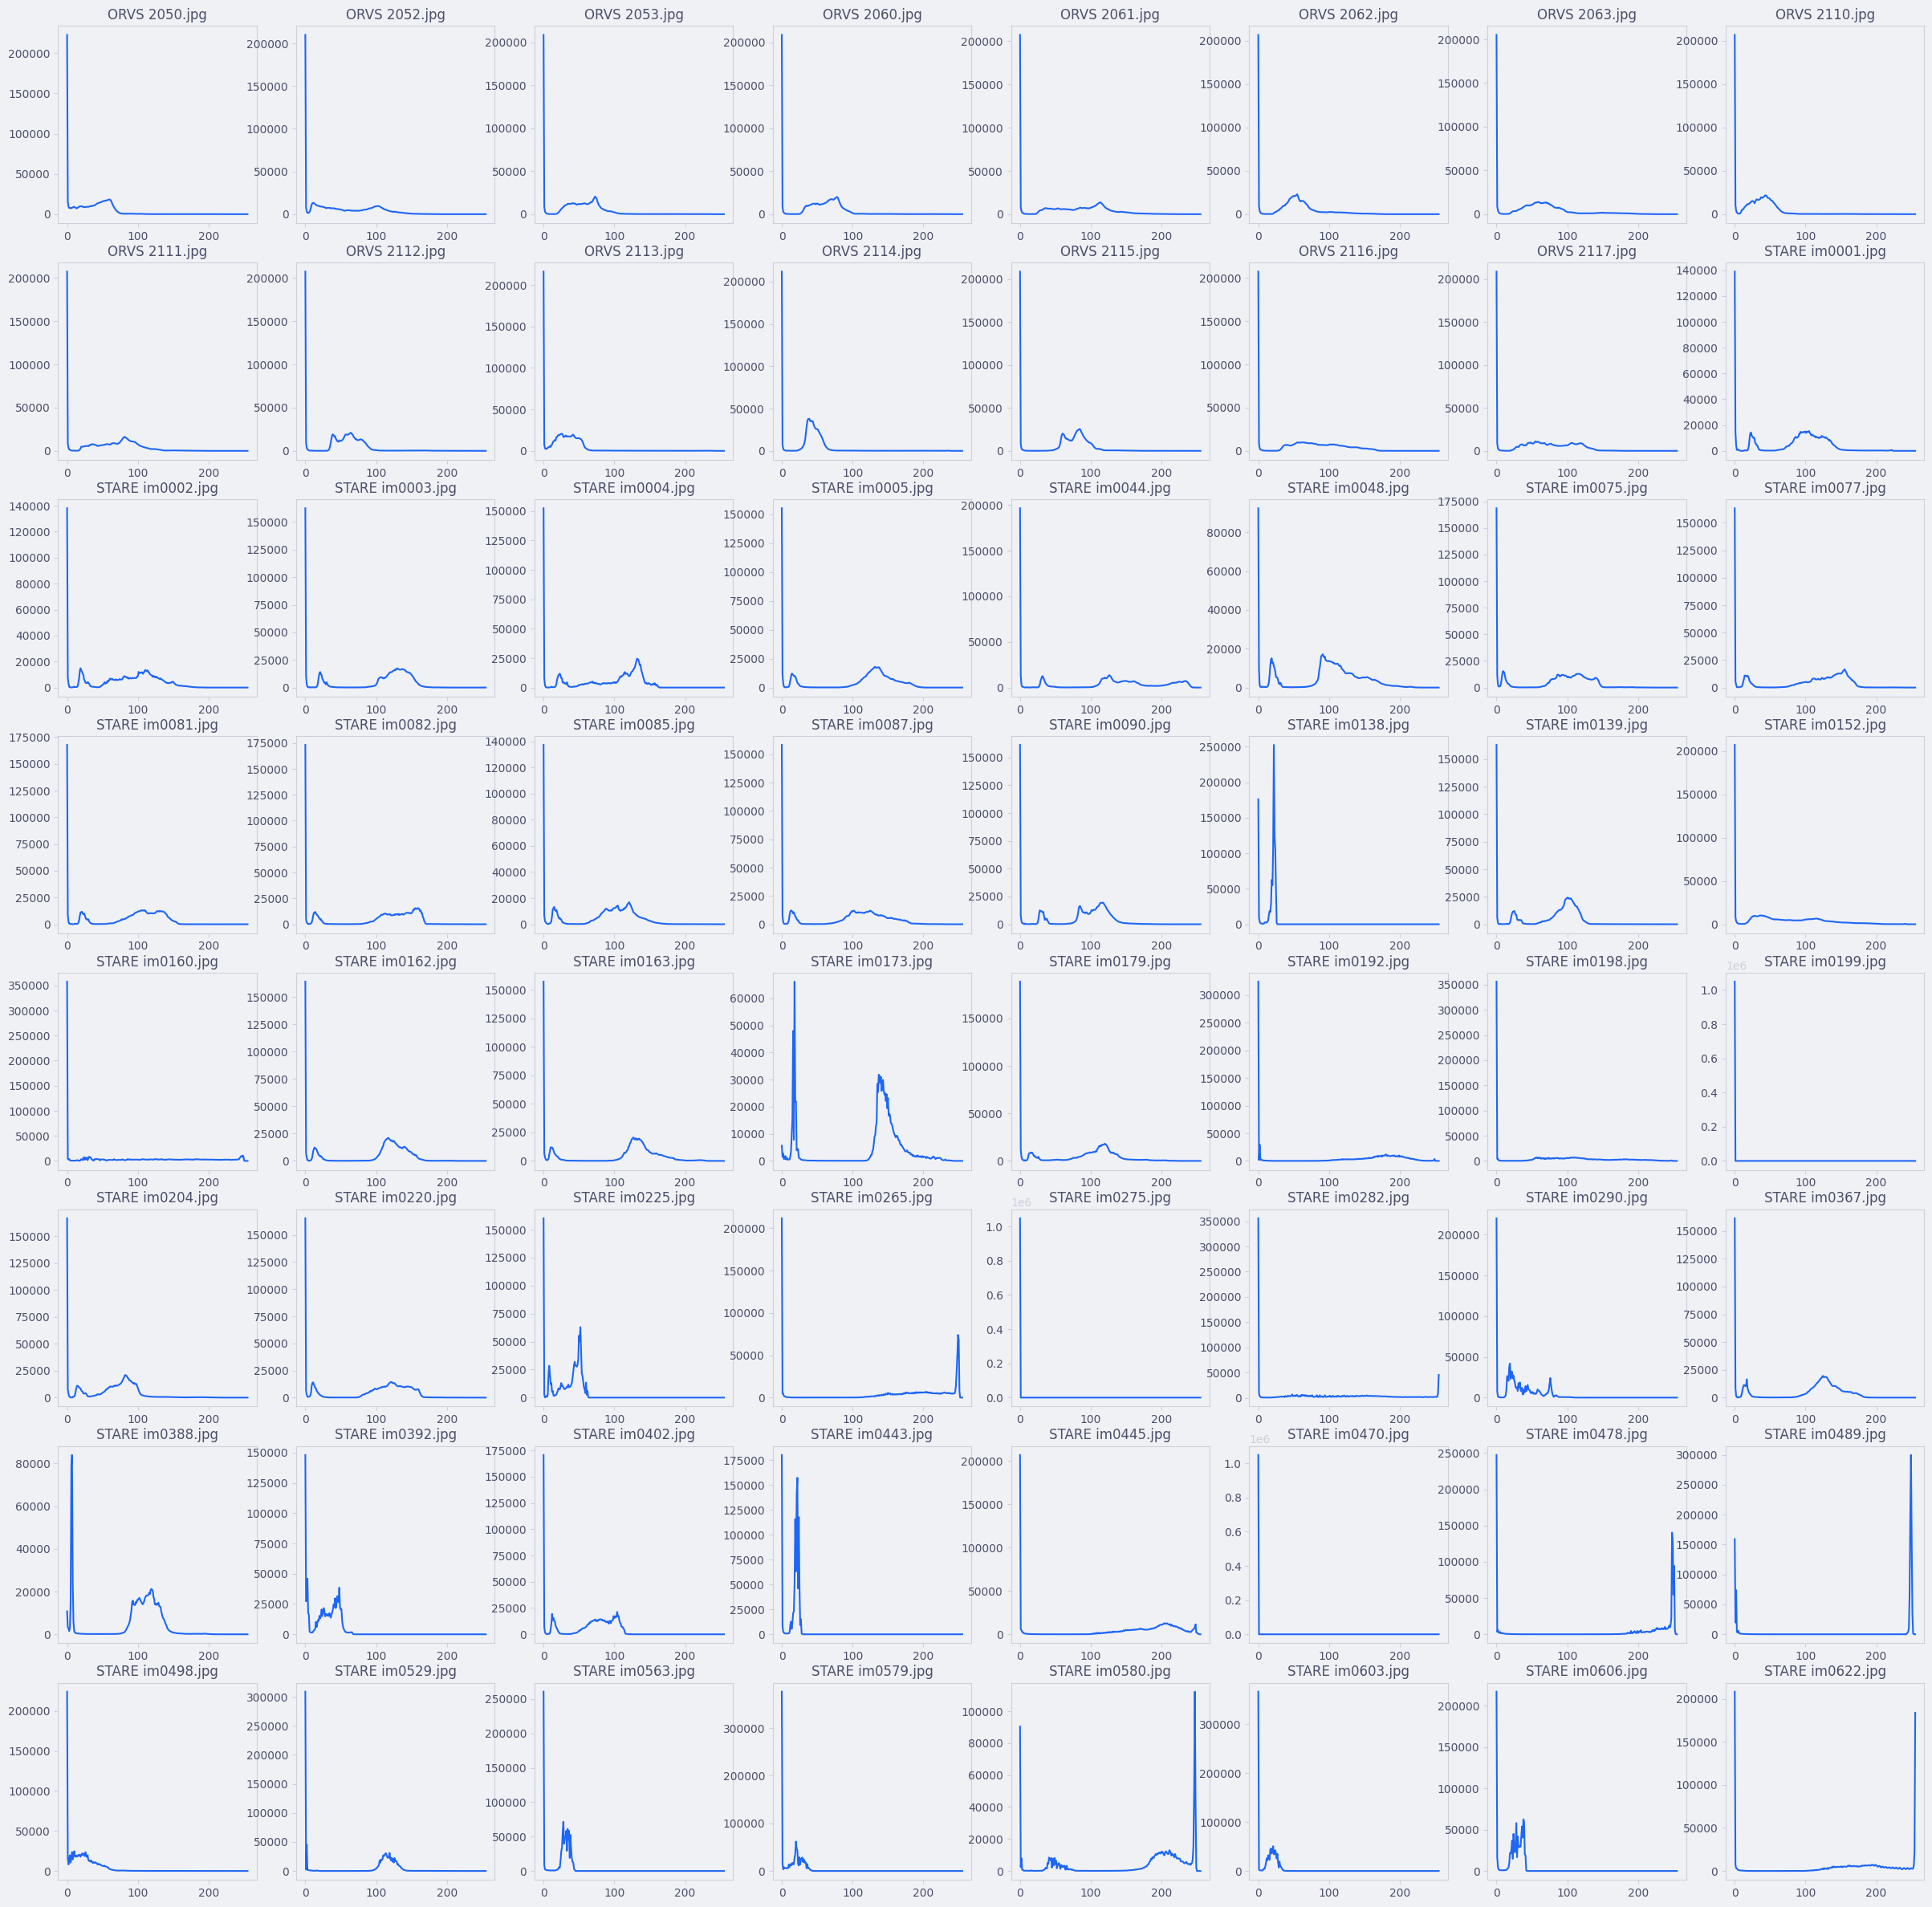

In [186]:
plt_hist(250)

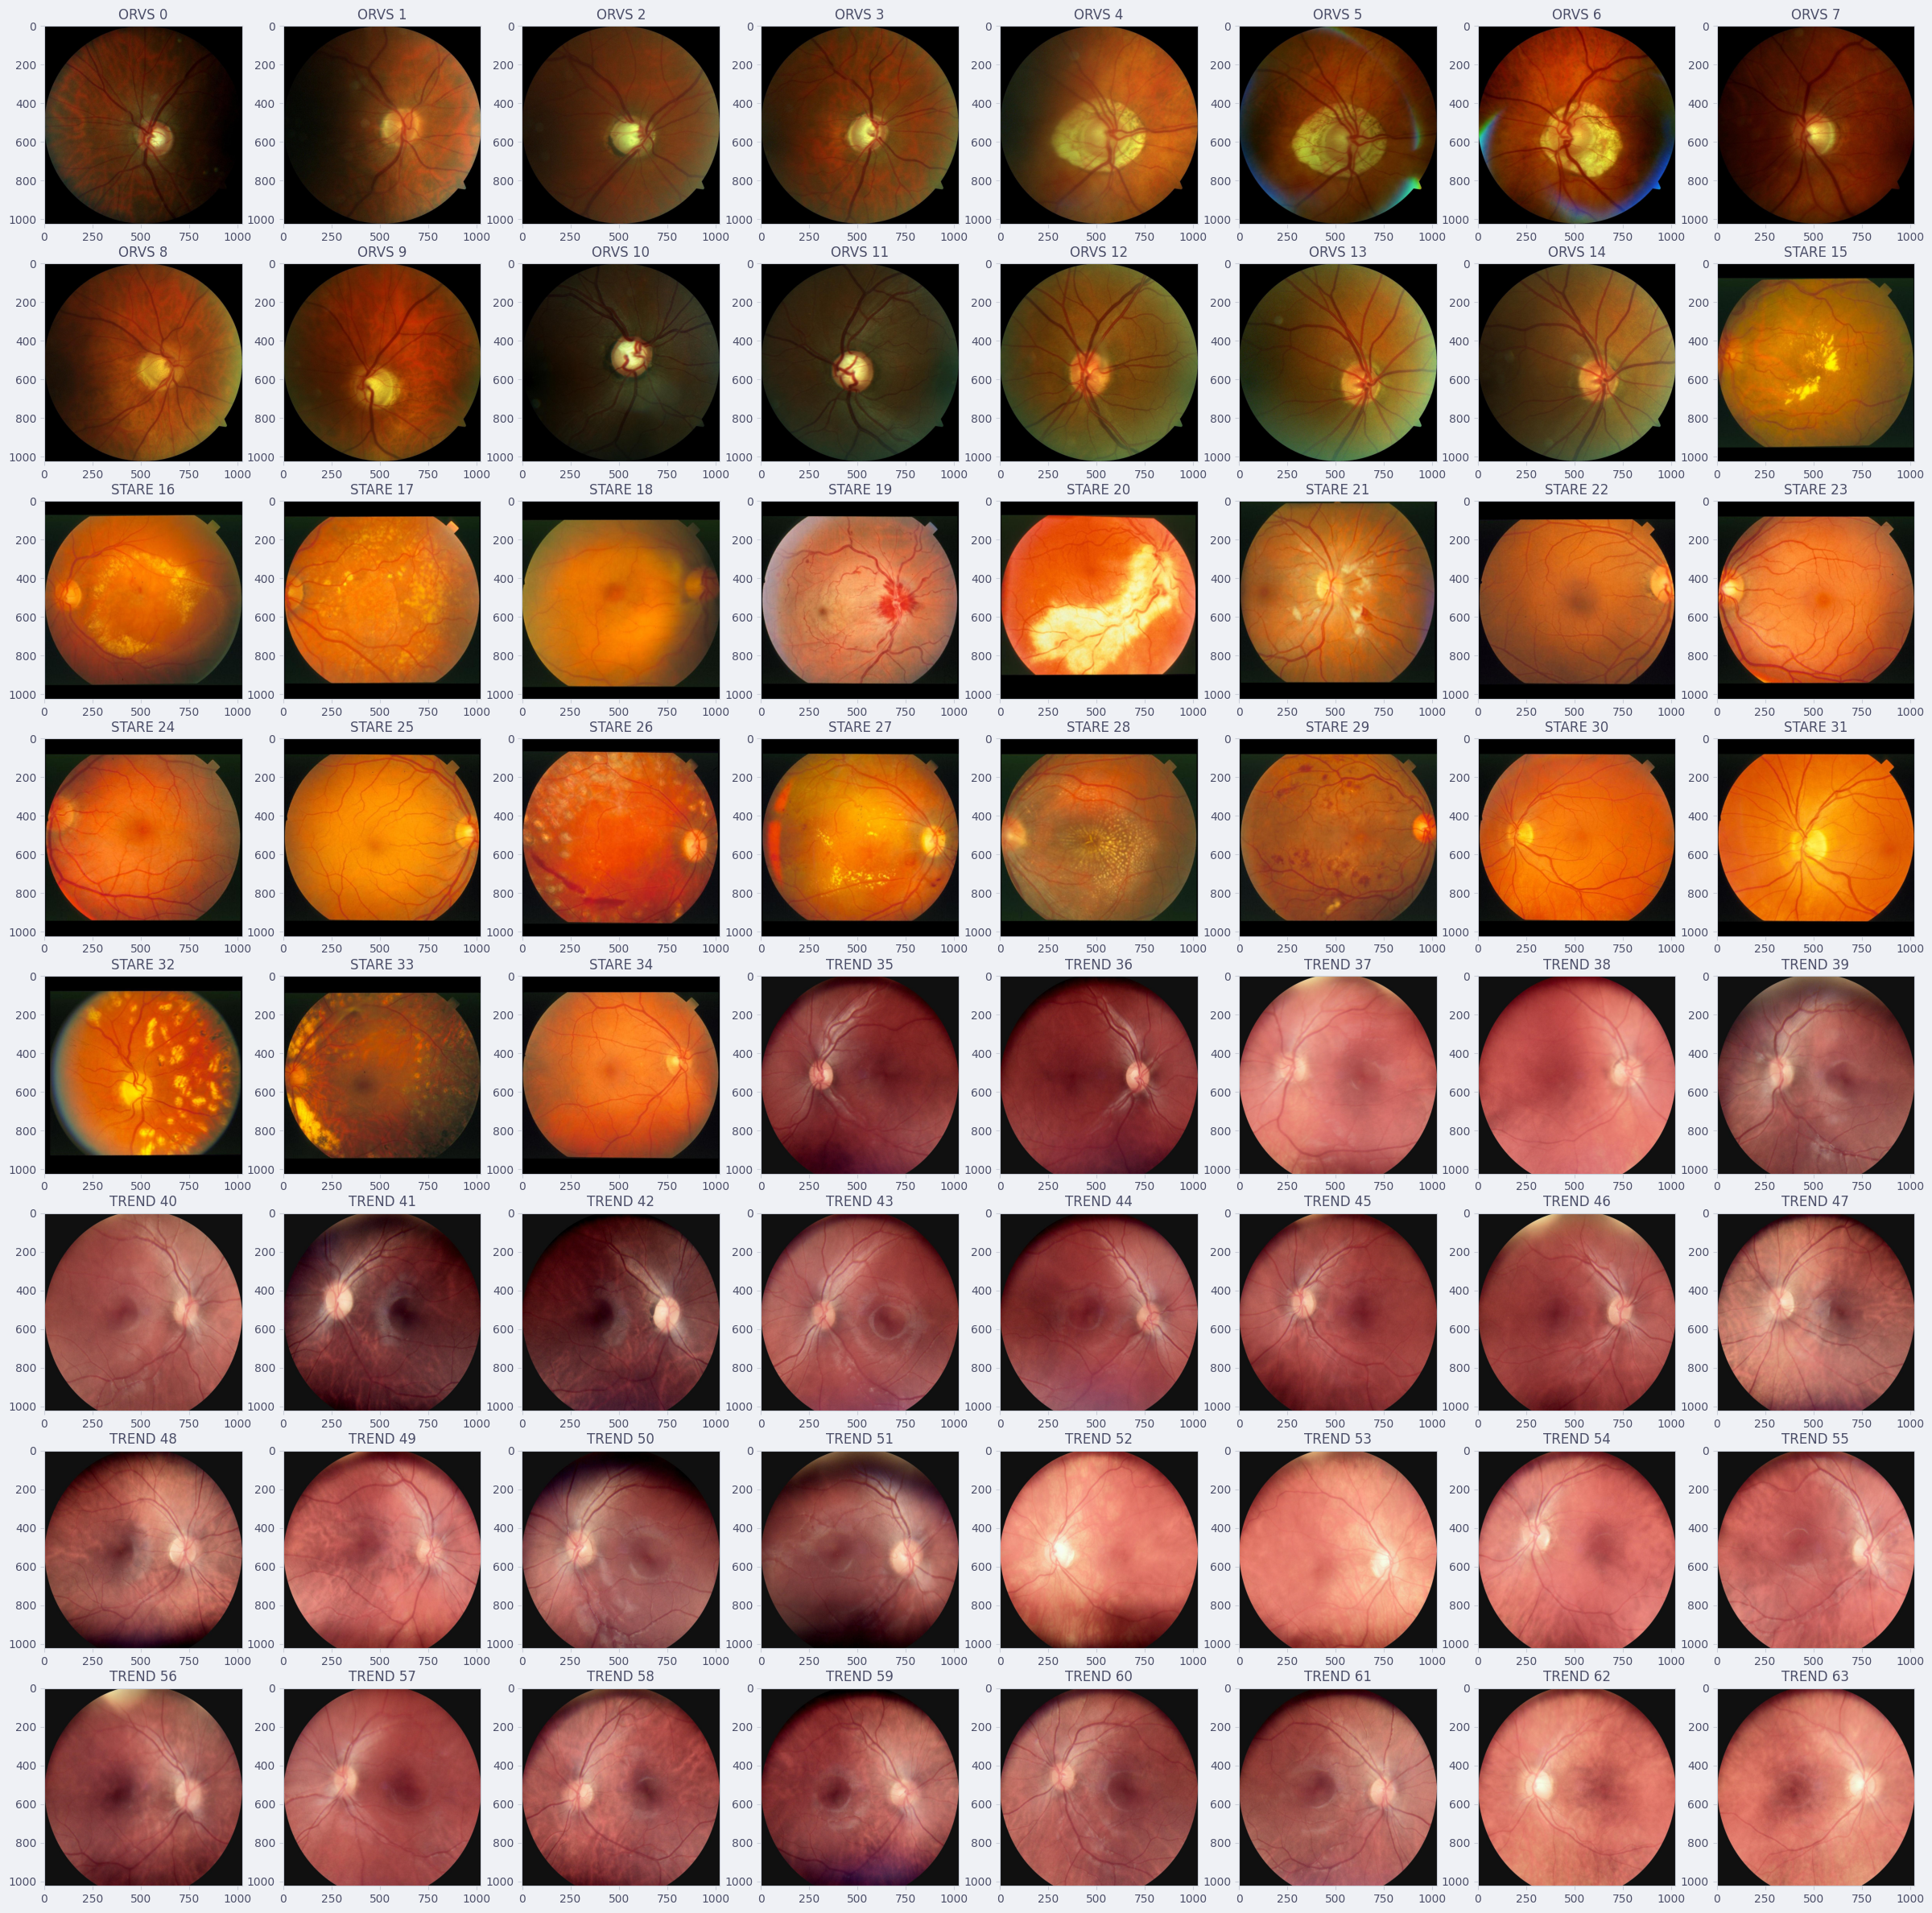

In [45]:
plt_rgb(250)

In [3]:
import imgaug.augmenters as iaa

aug = iaa.MultiplyBrightness((-1, 3))

for i in range(0, 70):
    x = np.random.randint(0, len(df))
    img = cv2.imread(df['Path'].iloc[x])
    im_a = aug(image=img)
    cv2.imwrite(f'./outliers/{time.time()}.jpg', im_a)

NameError: name 'df' is not defined

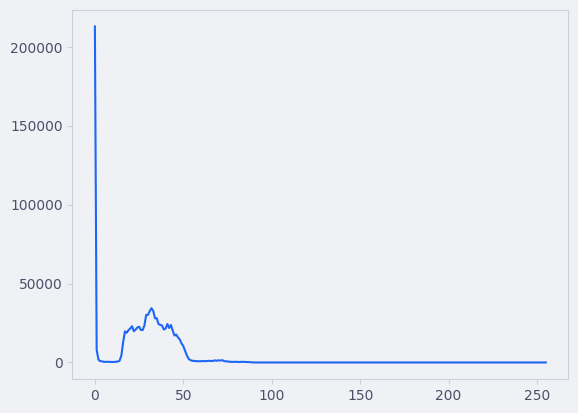

15231.624

In [36]:
img = cv2.cvtColor(cv2.imread('../data/backup/outliers/1697379559.5123541.jpg'), cv2.COLOR_BGR2GRAY)
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr) 
plt.show()

from scipy.stats import skew 

histr.std()

In [184]:
import os

d = os.listdir('./outliers/')
u = []
for i in d:
    num = np.random.randint(100,999)
    if num not in u:
        os.rename(f'./outliers/{i}',f'./outliers/STARE_im0{num}.jpg')
    u.append(num)